# 1. Importing Necessary Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import os
import shutil

In [6]:
Batch=35
img_size=200
img_layers=3
epochs=10
path = os.path.join('data', 'images')

In [7]:
Batch

35

##### Moving files to different Categories based on Age

In [20]:
for file in os.listdir(os.path.join('data', 'images')):
    age = int(file.split('_')[0])
    
    orignal_path = os.path.join('data', 'images', file)
     
    
    if age>=0 and age<=5:        
        new_path = os.path.join('data', '0-5')
        shutil.move(orignal_path, new_path)
        
    elif  age>=6 and age<=13:
        new_path = os.path.join('data', '6-13')
        shutil.move(orignal_path, new_path)

    elif  age>=14 and age<=18:
        new_path = os.path.join('data', '14-18')
        shutil.move(orignal_path, new_path)

    elif age>=19 and age<=30:
        new_path = os.path.join('data', '19-30')
        shutil.move(orignal_path, new_path)

    elif  age>=31 and age<=45:
        new_path = os.path.join('data', '31-45')
        shutil.move(orignal_path, new_path)

    elif age>=46 and age<=59:
        new_path = os.path.join('data', '46-59')
        shutil.move(orignal_path, new_path)

    elif age>=60 and age<=80:
        new_path = os.path.join('data', '60-80')
        shutil.move(orignal_path, new_path)

    else:              # age>=81 and age<=120:
        new_path = os.path.join('data', '81-120')
        shutil.move(orignal_path, new_path)

    

# Loading Dataset

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory('data',shuffle = True, image_size = (img_size, img_size), batch_size = Batch)

Found 23709 files belonging to 8 classes.


In [9]:
labels = dataset.class_names
print(labels)

['0-5', '14-18', '19-30', '31-45', '46-59', '6-13', '60-80', '81-120']


In [10]:
dataset.as_numpy_iterator().next()

(array([[[[105., 120., 117.],
          [ 99., 114., 111.],
          [ 90., 102., 100.],
          ...,
          [  4.,   3.,   8.],
          [  4.,   3.,   8.],
          [  4.,   3.,   8.]],
 
         [[105., 120., 117.],
          [ 99., 114., 111.],
          [ 90., 102., 100.],
          ...,
          [  5.,   4.,   9.],
          [  5.,   4.,   9.],
          [  5.,   4.,   9.]],
 
         [[105., 120., 117.],
          [ 99., 114., 111.],
          [ 90., 102., 100.],
          ...,
          [  5.,   4.,   9.],
          [  5.,   4.,   9.],
          [  5.,   4.,   9.]],
 
         ...,
 
         [[102., 135., 128.],
          [102., 135., 128.],
          [101., 134., 127.],
          ...,
          [ 16.,  12.,   9.],
          [ 16.,  12.,   9.],
          [ 17.,  13.,  10.]],
 
         [[103., 136., 129.],
          [103., 136., 129.],
          [102., 135., 128.],
          ...,
          [ 14.,  13.,   9.],
          [ 15.,  14.,  10.],
          [ 15.,  14.,  10.

In [11]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.BatchDataset

### Displaying Dataset

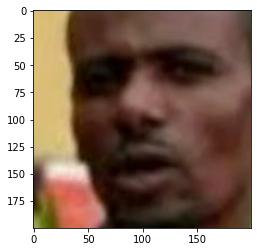

In [12]:
for image_batch, image_label in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

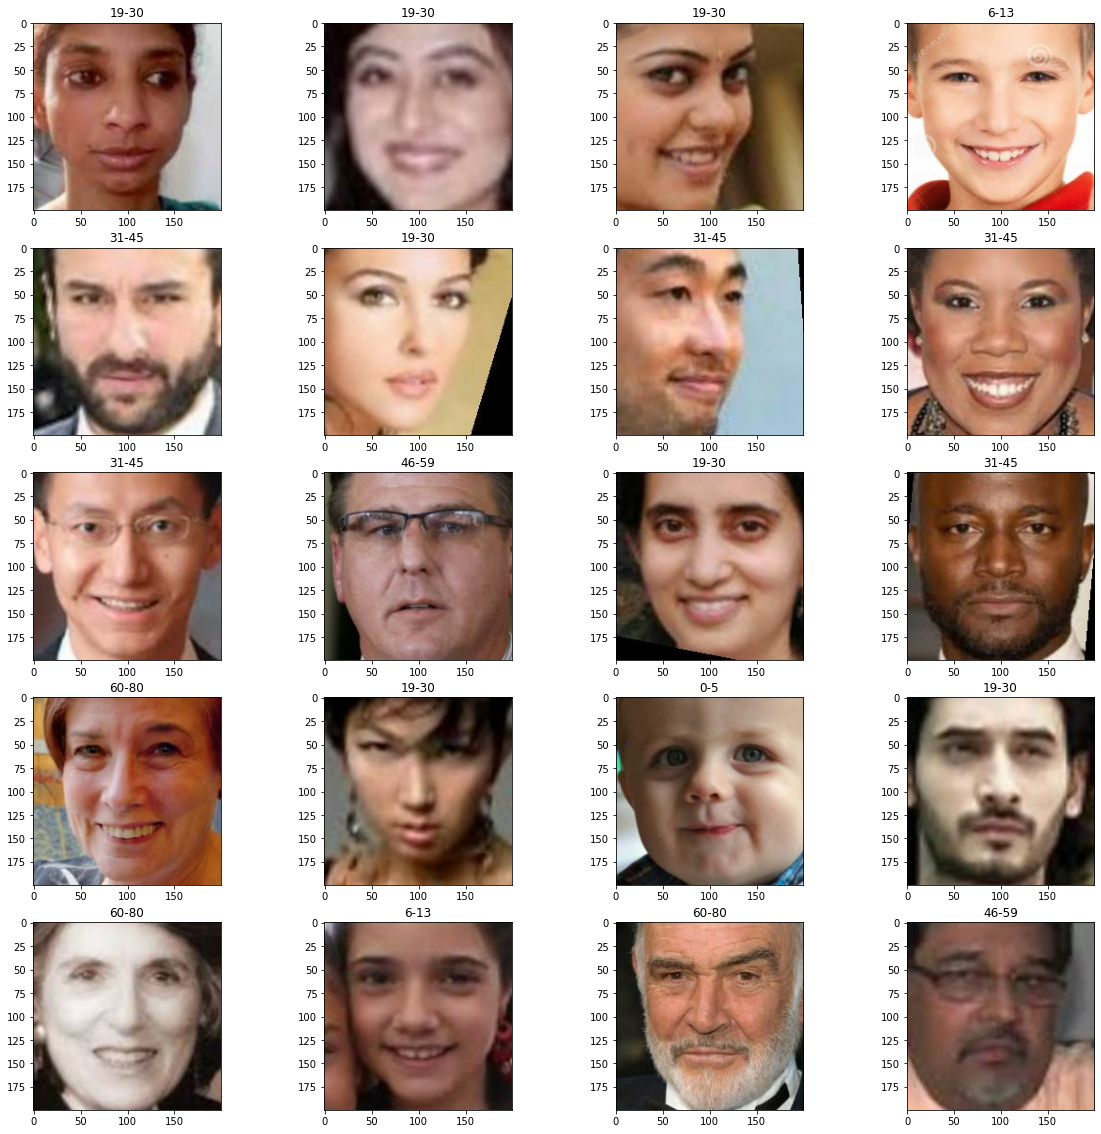

In [13]:
plt.figure(figsize=(20,20))
for image_batch, label_batch in dataset.take(1):
    for i in range(20):
        plt.subplot(5,4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(labels[label_batch[i]])

# Generating Train, Test and Validation Split

In [14]:
def partition_data(data, train_split = 0.8, test_split = 0.1, val_split = 0.1, shuffle=True, shuffle_size = 20000):
    data_count = len(data)
    
    if shuffle:
        data = data.shuffle(shuffle_size, seed=12)
        
    train_size = int(data_count*train_split)
    val_size = int(data_count*val_split)
    test_size = int(data_count*test_split)
    
    train_data = data.take(train_size)
    val_data = data.skip(train_size).take(val_size)
    test_data = data.skip(train_size).skip(val_size).take(test_size)
    
    return train_data, val_data, test_data

In [15]:
train, validate, test = partition_data(dataset)

In [16]:
print(f"Length:\n  1. Train : {len(train)}\n  2. Test : {len(test)}\n  3. Validation : {len(validate)}")

Length:
  1. Train : 542
  2. Test : 67
  3. Validation : 67


### Improve performance using Cache and Prefetch

In [15]:
train = train.cache().shuffle(20000).prefetch(buffer_size = tf.data.AUTOTUNE)
validate = validate.cache().shuffle(20000).prefetch(buffer_size = tf.data.AUTOTUNE)
test = test.cache().shuffle(20000).prefetch(buffer_size = tf.data.AUTOTUNE)

# Creating Neural Network

In [16]:
data_agumentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [17]:
data_input_shape = (Batch, img_size, img_size, img_layers)
n_classes = len(dataset.class_names)

model = models.Sequential([
    layers.Conv2D(16, (3,3), activation = 'relu', input_shape=data_input_shape[1:]),
    layers.MaxPooling2D((2,2)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation = 'relu'),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3,3), activation = 'relu'),
    layers.Flatten(),
    #layers.Dense(32, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'),
])
model.build(input_shape=data_input_shape)

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 99, 99, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 dropout (Dropout)           (None, 97, 97, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 95, 95, 128)      

In [19]:
model.compile(
optimizer = 'adam',
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
metrics = ['accuracy']
)

In [20]:
history = model.fit(
    train,
    epochs = epochs,
    batch_size = Batch,
    verbose = 1,
    validation_data = validate
)

Epoch 1/10
542/542 [==============================] - 2498s 4s/step - loss: 2.3174 - accuracy: 0.4703 - val_loss: 1.1866 - val_accuracy: 0.5514
Epoch 2/10
542/542 [==============================] - 1483s 3s/step - loss: 1.0198 - accuracy: 0.5962 - val_loss: 0.9068 - val_accuracy: 0.6840
Epoch 3/10
542/542 [==============================] - 2272s 4s/step - loss: 0.7249 - accuracy: 0.7181 - val_loss: 0.6866 - val_accuracy: 0.7586
Epoch 4/10
542/542 [==============================] - 1553s 3s/step - loss: 0.4760 - accuracy: 0.8231 - val_loss: 0.5262 - val_accuracy: 0.8294
Epoch 5/10
542/542 [==============================] - 2090s 4s/step - loss: 0.3159 - accuracy: 0.8831 - val_loss: 0.4833 - val_accuracy: 0.8716
Epoch 6/10
542/542 [==============================] - 1546s 3s/step - loss: 0.2258 - accuracy: 0.9221 - val_loss: 0.5588 - val_accuracy: 0.8452
Epoch 7/10
542/542 [==============================] - 2160s 4s/step - loss: 0.1833 - accuracy: 0.9414 - val_loss: 0.6541 - val_accuracy:

In [21]:
model.save("AgeEstimator.h5")

In [22]:
108848/1024

106.296875

In [23]:
import gc

In [24]:
gc.collect()

48114

# Testing the Model

In [4]:
age_estimator = models.load_model("AgeEstimator.h5")

In [17]:
accuracy = age_estimator.evaluate(test)

67/67 [==============================] - 486s 825ms/step - loss: 0.7997 - accuracy: 0.8725
